In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('adult/adult.data')

In [4]:
data.columns

Index(['AGE', ' Workclass', ' Final_weight', ' Education',
       ' Years of education', ' Marital Status', ' Occupation',
       ' Relationship', ' Race', ' Sex', ' Capital gain', ' Capital loss',
       ' Hours per week', ' Native country', ' Income'],
      dtype='object')

In [5]:
data.shape

(32561, 15)

In [6]:
data.isnull().sum()

AGE                    0
 Workclass             0
 Final_weight          0
 Education             0
 Years of education    0
 Marital Status        0
 Occupation            0
 Relationship          0
 Race                  0
 Sex                   0
 Capital gain          0
 Capital loss          0
 Hours per week        0
 Native country        0
 Income                0
dtype: int64

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': ' Final_weight'}>],
       [<Axes: title={'center': ' Years of education'}>,
        <Axes: title={'center': ' Capital gain'}>],
       [<Axes: title={'center': ' Capital loss'}>,
        <Axes: title={'center': ' Hours per week'}>]], dtype=object)

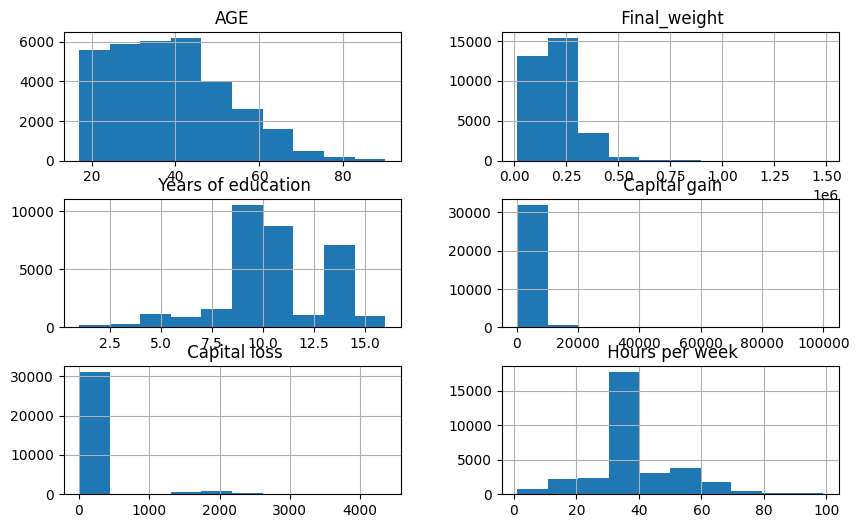

In [7]:
data.hist(bins=10, figsize=(10,6))


In [8]:
data.head()

,AGE,Workclass,Final_weight,Education,Years of education,Marital Status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
for col in data.columns:
    if data[col].dtype == object:
        print(f"Unique values in {col}: {data[col].unique()}")

Unique values in  Workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in  Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values in  Marital Status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values in  Occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Unique values in  Relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Unique values in  Race: [' White' ' Black' ' Asian-Pac-Islander' ' Am

## converting categorical values into numerical by using encoding and mapping techniques

We can use multiple techniques 

# 🚀 Summary Table of Encoding Techniques

| Encoding Type          | Best for            | Pros                                      | Cons                                  |
|------------------------|--------------------|------------------------------------------|---------------------------------------|
| **One-Hot Encoding**   | Nominal            | Simple, widely used                      | High memory usage                     |
| **Label Encoding**     | Ordinal            | Fast, simple                             | Misinterprets ordinal importance      |
| **Ordinal Encoding**   | Ordered categories | Captures order                           | Requires domain knowledge             |
| **Target Encoding**    | High-cardinality   | Efficient, useful for categorical-target relationships | Risk of data leakage |
| **Frequency Encoding** | High-cardinality   | Reduces dimensions                       | Can misrepresent categories           |
| **Binary Encoding**    | Large categories   | Space-efficient                          | May lose information                  |
| **Hash Encoding**      | Large categories   | Handles high-cardinality well            | Risk of collisions                    |
| **Word Embedding**     | Text               | Captures semantic meaning                | Requires NLP processing               |

In [12]:
data.columns = data.columns.str.strip()


In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# Define categorical features
categorical_features = {
    "ordinal": ["Education", "Workclass", "Marital Status", "Occupation", "Relationship", "Race", "Sex"],  # Use ordinal instead of OHE
    "label": ["Income"]
}

# Define encoders
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  # Handles unseen values
label_encoder = LabelEncoder()

# Apply ordinal encoding for all categorical features
for feature in categorical_features["ordinal"]:
    if feature in data.columns:  # Ensure the column exists
        data[feature] = ordinal_encoder.fit_transform(data[[feature]])
    else:
        print(f"⚠️ Skipping '{feature}' - Column not found in dataset.")

# Apply label encoding for target variable
for feature in categorical_features["label"]:
    if feature in data.columns:
        data[feature] = label_encoder.fit_transform(data[feature])

# Handle 'Native Country' column if it exists
if "Native country" in data.columns:
    data["Native country"] = ordinal_encoder.fit_transform(data[["Native country"]])

# Display first few rows of transformed dataset
print(data.head())

   AGE  Workclass  Final_weight  Education  Years of education  \
0   39        7.0         77516        9.0                  13   
1   50        6.0         83311        9.0                  13   
2   38        4.0        215646       11.0                   9   
3   53        4.0        234721        1.0                   7   
4   28        4.0        338409        9.0                  13   

   Marital Status  Occupation  Relationship  Race  Sex  Capital gain  \
0             4.0         1.0           1.0   4.0  1.0          2174   
1             2.0         4.0           0.0   4.0  1.0             0   
2             0.0         6.0           1.0   4.0  1.0             0   
3             2.0         6.0           0.0   2.0  1.0             0   
4             2.0        10.0           5.0   2.0  0.0             0   

   Capital loss  Hours per week  Native country  Income  
0             0              40            39.0       0  
1             0              13            39.0       

In [14]:
data.corr()

,AGE,Workclass,Final_weight,Education,Years of education,Marital Status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
AGE,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
Workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
Final_weight,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Years of education,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital Status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
Relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
Sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


In [15]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Define categorical features
categorical_features = {
    "ordinal": ["Education", "Workclass", "Marital Status", "Occupation", "Relationship", "Race", "Sex"],  
    "label": ["Income"]
}

# Define encoders
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  # Handles unseen values
label_encoder = LabelEncoder()

# Dictionary to store mappings
encoding_mappings = {}

# Apply ordinal encoding for categorical features
for feature in categorical_features["ordinal"]:
    if feature in data.columns:
        data[feature] = ordinal_encoder.fit_transform(data[[feature]])
        
        # Store mapping
        encoding_mappings[feature] = {category: idx for idx, category in enumerate(ordinal_encoder.categories_[0])}
        
        # Display the mapping for future reference
        print(f"\nOrdinal Encoding Mapping for '{feature}':")
        for category, idx in encoding_mappings[feature].items():
            print(f"  {category} → {idx}")
    else:
        print(f"⚠️ Skipping '{feature}' - Column not found in dataset.")

# Apply label encoding for target variable
for feature in categorical_features["label"]:
    if feature in data.columns:
        data[feature] = label_encoder.fit_transform(data[feature])
        
        # Store and display mapping
        encoding_mappings[feature] = {category: idx for idx, category in enumerate(label_encoder.classes_)}
        
        print(f"\nLabel Encoding Mapping for '{feature}':")
        for category, idx in encoding_mappings[feature].items():
            print(f"  {category} → {idx}")

# Handle 'Native Country' column if it exists
if "Native country" in data.columns:
    data["Native country"] = ordinal_encoder.fit_transform(data[["Native country"]])
    
    # Store mapping
    encoding_mappings["Native country"] = {category: idx for idx, category in enumerate(ordinal_encoder.categories_[0])}

    print("\nOrdinal Encoding Mapping for 'Native country':")
    for category, idx in encoding_mappings["Native country"].items():
        print(f"  {category} → {idx}")

# Display first few rows of transformed dataset
print("\nTransformed Data Preview:")
print(data.head())

# Store encoding mappings for later reference
print("\nEncoding Mappings Dictionary:")
print(encoding_mappings)


Ordinal Encoding Mapping for 'Education':
  0.0 → 0
  1.0 → 1
  2.0 → 2
  3.0 → 3
  4.0 → 4
  5.0 → 5
  6.0 → 6
  7.0 → 7
  8.0 → 8
  9.0 → 9
  10.0 → 10
  11.0 → 11
  12.0 → 12
  13.0 → 13
  14.0 → 14
  15.0 → 15

Ordinal Encoding Mapping for 'Workclass':
  0.0 → 0
  1.0 → 1
  2.0 → 2
  3.0 → 3
  4.0 → 4
  5.0 → 5
  6.0 → 6
  7.0 → 7
  8.0 → 8

Ordinal Encoding Mapping for 'Marital Status':
  0.0 → 0
  1.0 → 1
  2.0 → 2
  3.0 → 3
  4.0 → 4
  5.0 → 5
  6.0 → 6

Ordinal Encoding Mapping for 'Occupation':
  0.0 → 0
  1.0 → 1
  2.0 → 2
  3.0 → 3
  4.0 → 4
  5.0 → 5
  6.0 → 6
  7.0 → 7
  8.0 → 8
  9.0 → 9
  10.0 → 10
  11.0 → 11
  12.0 → 12
  13.0 → 13
  14.0 → 14

Ordinal Encoding Mapping for 'Relationship':
  0.0 → 0
  1.0 → 1
  2.0 → 2
  3.0 → 3
  4.0 → 4
  5.0 → 5

Ordinal Encoding Mapping for 'Race':
  0.0 → 0
  1.0 → 1
  2.0 → 2
  3.0 → 3
  4.0 → 4

Ordinal Encoding Mapping for 'Sex':
  0.0 → 0
  1.0 → 1

Label Encoding Mapping for 'Income':
  0 → 0
  1 → 1

Ordinal Encoding Mapping

<Axes: >

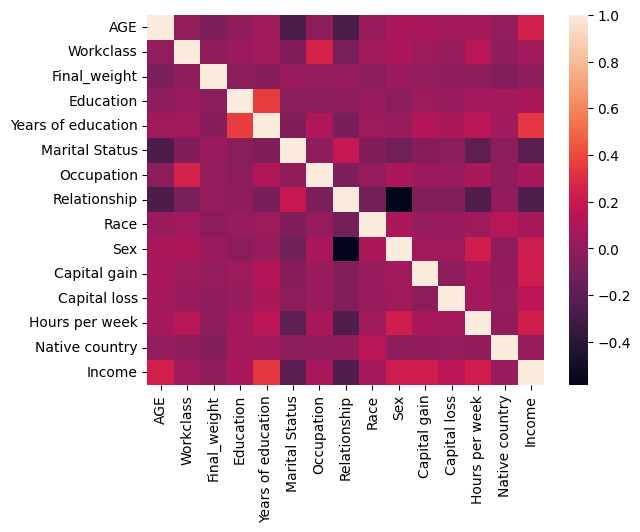

In [16]:
sns.heatmap(data.corr())

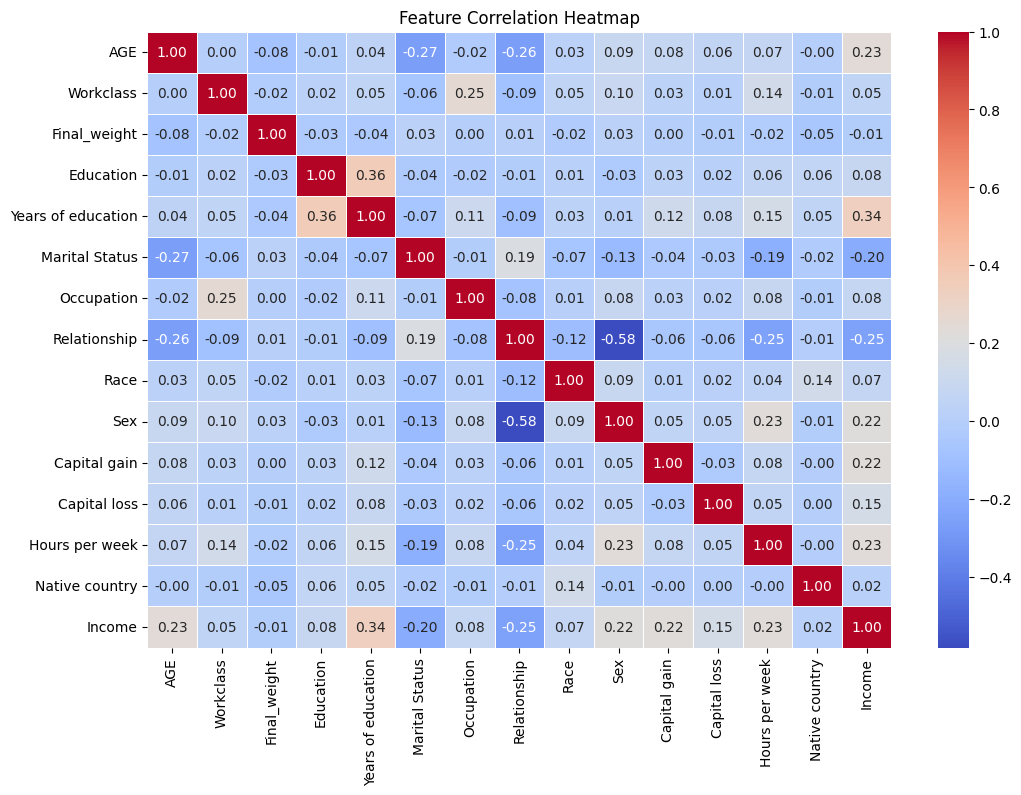

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()





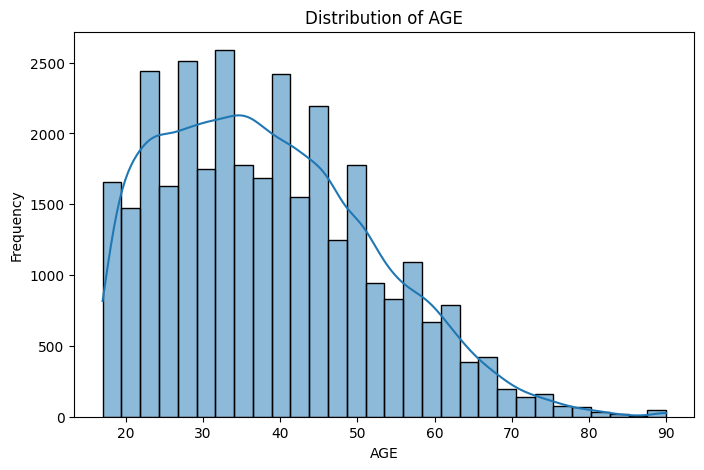

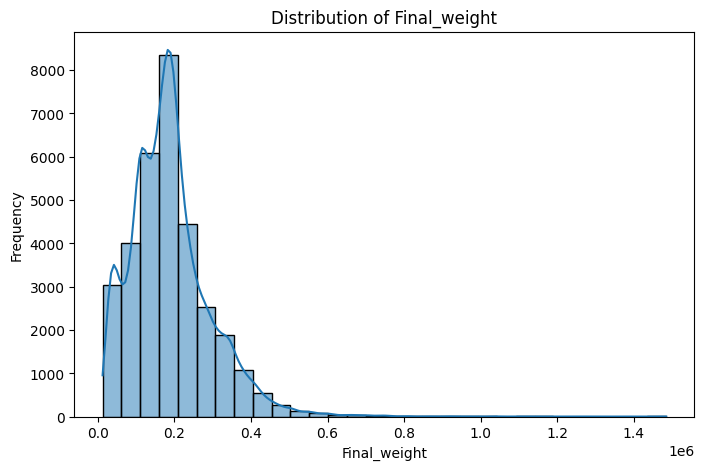

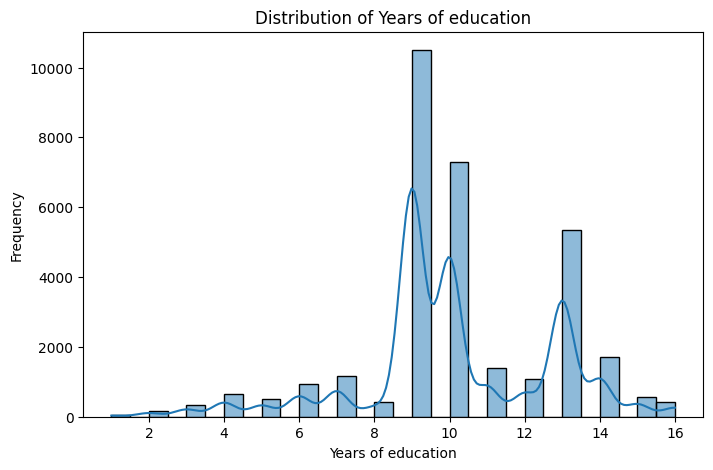

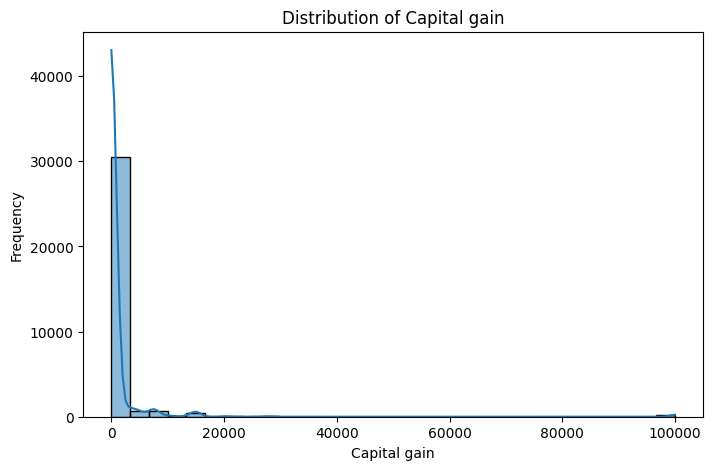

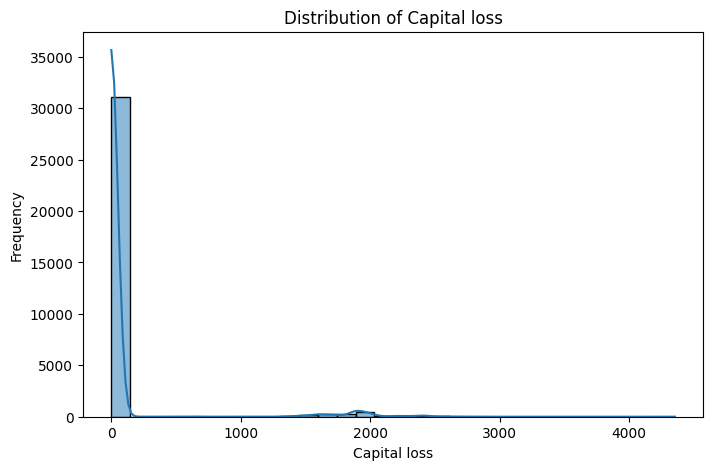

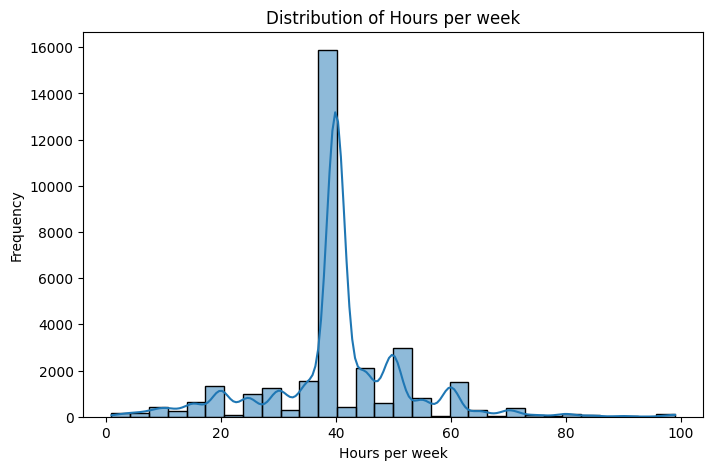

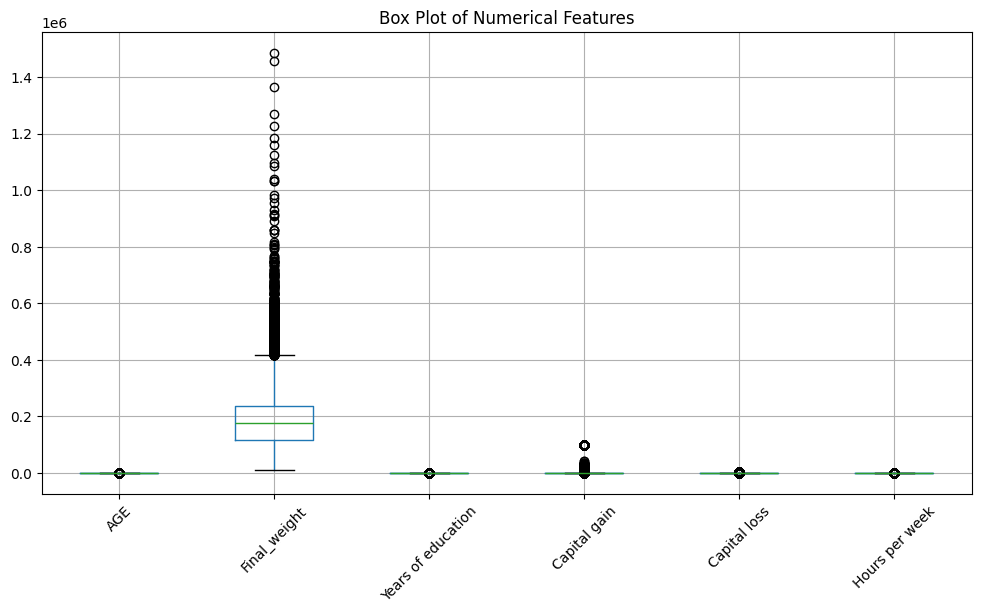

In [18]:
# Distribution plots for numerical features
num_cols = ['AGE', 'Final_weight', 'Years of education', 'Capital gain', 'Capital loss', 'Hours per week']
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Box plots to detect outliers
plt.figure(figsize=(12, 6))
data[num_cols].boxplot()
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Normalization Techniques for Binary Classification

Normalization is essential in binary classification tasks to scale features, improve convergence, and enhance model performance. The choice of normalization depends on the data distribution and the model being used.

## 1. Min-Max Scaling (Min-Max Normalization)
- Scales the features to a fixed range, usually `[0,1]` or `[-1,1]`.
- **Formula:**
  \[
  x' = \frac{x - \min(x)}{\max(x) - \min(x)}
  \]
- Suitable for data without outliers.

## 2. Z-score Normalization (Standardization)
- Transforms features to have zero mean and unit variance.
- **Formula:**
  \[
  x' = \frac{x - \mu}{\sigma}
  \]
- Useful when the data follows a Gaussian distribution.

## 3. Robust Scaling
- Uses the median and interquartile range (IQR) instead of mean and standard deviation.
- **Formula:**
  \[
  x' = \frac{x - \text{median}}{\text{IQR}}
  \]
- Effective for data with outliers.

## 4. Log Transformation
- Applies logarithm to compress large values and stabilize variance.
- **Formula:**
  \[
  x' = \log(x + 1)
  \]
- Used for positively skewed distributions.

## 5. Power Transformations (Box-Cox & Yeo-Johnson)
- Make data more Gaussian-like.
- **Box-Cox:** Requires strictly positive data.
- **Yeo-Johnson:** Works with negative values as well.

## 6. Max Abs Scaling
- Divides each feature by its maximum absolute value.
- **Formula:**
  \[
  x' = \frac{x}{\max |x|}
  \]
- Retains sparsity and is useful for datasets with zero-centered distributions.

## 7. L1 & L2 Normalization
- **L1 (Manhattan norm):** Scales data based on the sum of absolute values.
- **L2 (Euclidean norm):** Scales data based on the sum of squared values.
- Often used in text classification and deep learning.

## 8. Sigmoid or Tanh Scaling
- Squashes data into a bounded range using:
  - **Sigmoid:**
    \[
    x' = \frac{1}{1 + e^{-x}}
    \]
    - Range: `[0,1]`
  - **Tanh:**
    \[
    x' = \frac{e^x - e^{-x}}{e^x + e^{-x}}
    \]
    - Range: `[-1,1]`
- Common in neural networks before feeding data to activation functions.

---

## Choosing the Right Normalization Technique
- **If data contains outliers:** Use **Robust Scaling** or **Log Transformation**.
- **If data is Gaussian:** Use **Standardization (Z-score)**.
- **If data is bounded:** Use **Min-Max Scaling**.
- **For deep learning models:** **Standardization** or **normalization with Sigmoid/Tanh** is common.

In [19]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['AGE', 'Years of education']
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


# Display first few rows
data.head()

,AGE,Workclass,Final_weight,Education,Years of education,Marital Status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
0,0.301370,7.0,77516,9.0,0.800000,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0
1,0.452055,6.0,83311,9.0,0.800000,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
2,0.287671,4.0,215646,11.0,0.533333,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
3,0.493151,4.0,234721,1.0,0.400000,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
4,0.150685,4.0,338409,9.0,0.800000,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0


In [20]:
for col in ['Final_weight', 'Hours per week']:
    lower_bound = data[col].quantile(0.01)  # 1st percentile
    upper_bound = data[col].quantile(0.99)  # 99th percentile
    data[col] = np.clip(data[col], lower_bound, upper_bound)

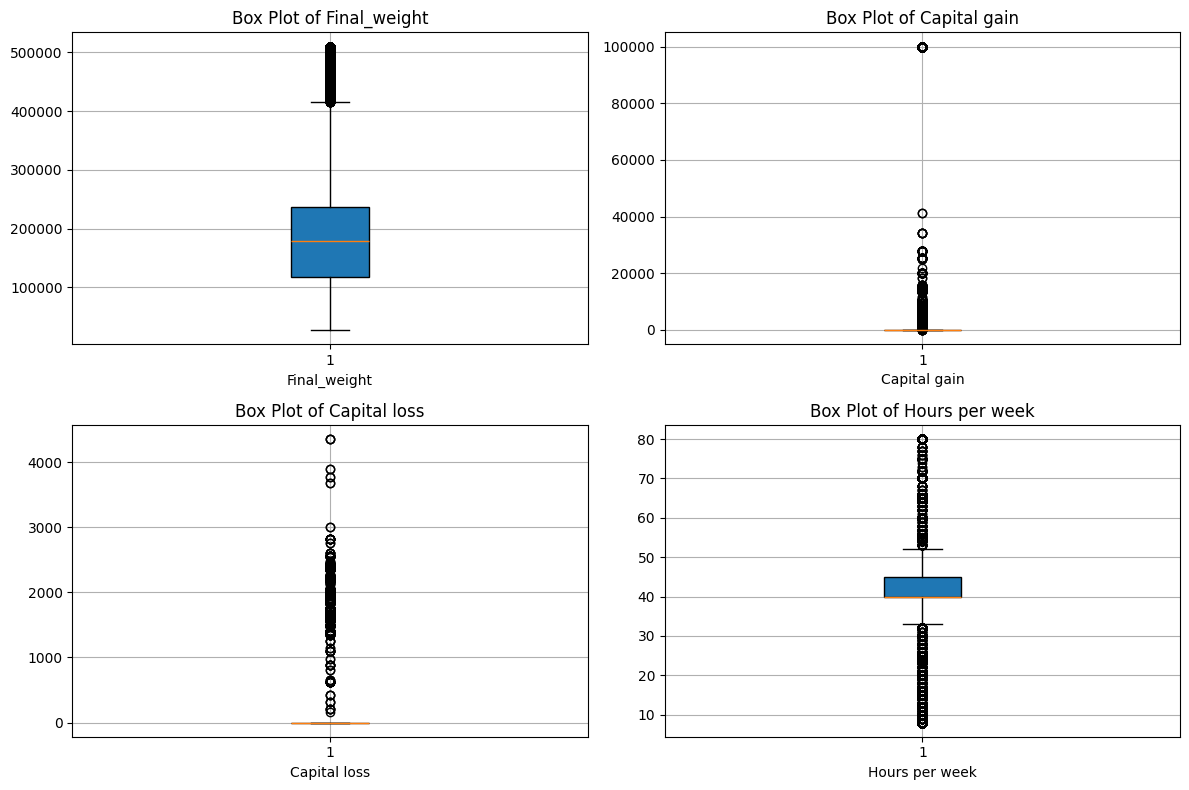

In [21]:
num_cols = ['Final_weight', 'Capital gain', 'Capital loss', 'Hours per week']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create box plots
for i, col in enumerate(num_cols):
    axes[i].boxplot(data[col], vert=True, patch_artist=True)
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

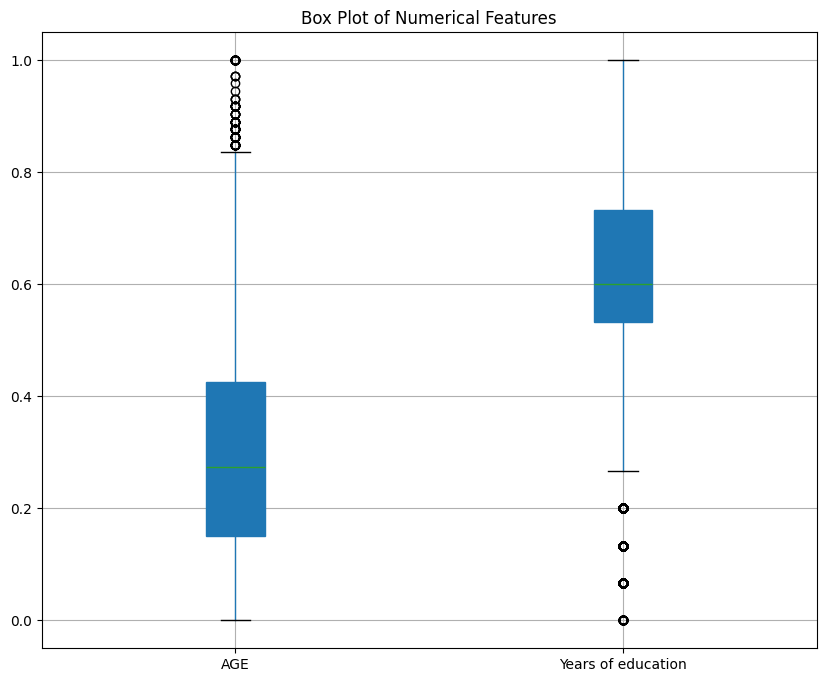

In [22]:
num_cols = ['AGE', 'Years of education']

plt.figure(figsize=(10,8))
data[num_cols].boxplot(vert = True, patch_artist = True)
plt.title("Box Plot of Numerical Features")
plt.show()